In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

In [2]:
# Veri setini yükleme
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

# Veri setinin başlığını kontrol etme
print(data.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [3]:
# Veri setinin özeti
print(data.describe())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


In [4]:
# Veri setinin karıştırılması
data = shuffle(data)
print(data.head())

     Gender  Height  Weight  Index
475    Male     183     131      4
30     Male     153     121      5
75   Female     197     154      4
447  Female     176     121      4
334  Female     157      56      2


# Veri setinin keşifsel veri analizi (EDA)

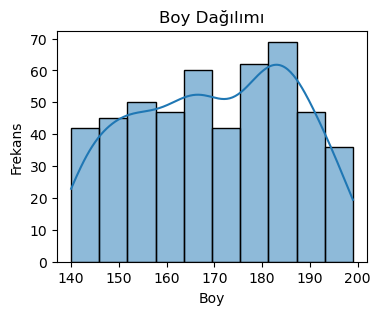

In [5]:
# Boyun dağılımı
plt.figure(figsize=(4,3))
sns.histplot(data["Height"], kde=True)
plt.title("Boy Dağılımı")
plt.xlabel("Boy")
plt.ylabel("Frekans")
plt.show()

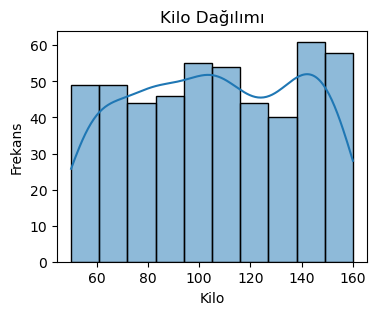

In [6]:
# Kilonun dağılımı
plt.figure(figsize=(4,3))
sns.histplot(data["Weight"], kde=True)
plt.title("Kilo Dağılımı")
plt.xlabel("Kilo")
plt.ylabel("Frekans")
plt.show()

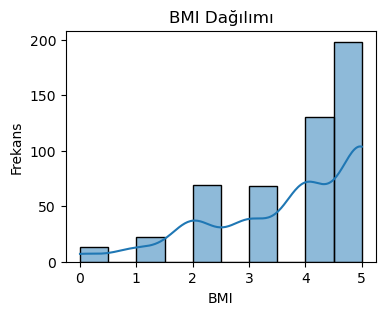

In [7]:
# BMI'nin dağılımı
plt.figure(figsize=(4,3))
sns.histplot(data["Index"], kde=True)
plt.title("BMI Dağılımı")
plt.xlabel("BMI")
plt.ylabel("Frekans")
plt.show()

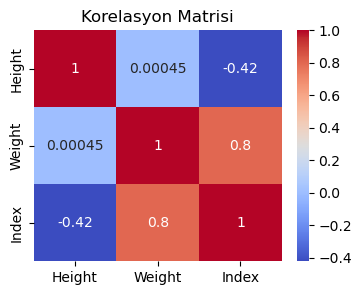

In [8]:
# Korelasyon matrisi
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(4,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [9]:
# Veri setini eğitim ve test olarak ayırma
train_data = data[:250]
test_data = data[250:]

In [10]:
# Verileri x,y (bağımsız değişkenler) ve z (bağımlı değişken) olarak ayırma
x_train = train_data['Height'].values
y_train = train_data['Weight'].values
z_train = train_data['Index'].values
x_test = test_data['Height'].values
y_test = test_data['Weight'].values
z_test = test_data['Index'].values

In [11]:
from LR import LinearRegression 
# Lineer regresyon modelini oluşturma
model = LinearRegression(learning_rate=0.00001, epoch=1000)

In [12]:
# Modeli eğitme
model.fit(x_train, y_train, z_train)

In [13]:
from sklearn.metrics import mean_squared_error
# Eğitim verisi için loss değerlerini hesaplama
train_predictions = model.predict(x_train, y_train)
train_loss = mean_squared_error(train_predictions, z_train)

# Test verisi için loss değerlerini hesaplama
test_predictions = model.predict(x_test, y_test)
test_loss = mean_squared_error(test_predictions, z_test)

train_loss, test_loss

(0.5541000685864959, 0.7150807512863141)

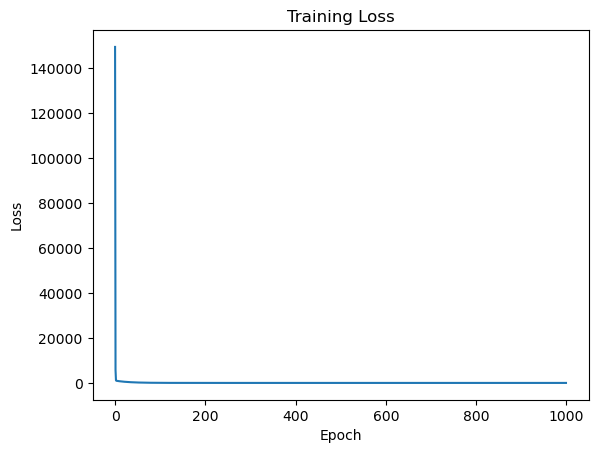

In [14]:
# Loss grafikleri
plt.plot(range(model.epoch), model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

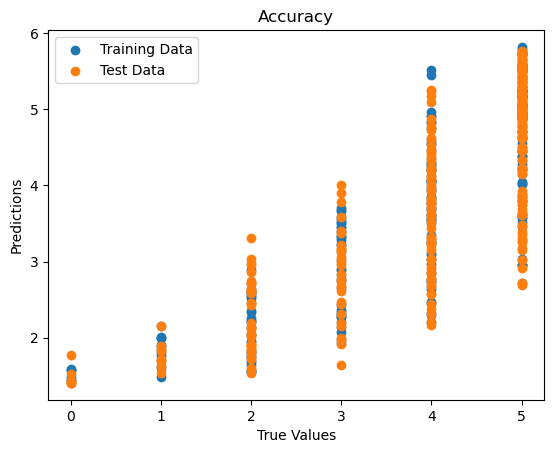

In [15]:
# Accuracy grafikleri
plt.scatter(z_train, train_predictions, label="Training Data")
plt.scatter(z_test, test_predictions, label="Test Data")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
# R-squared (Coefficient of Determination) ölçütü kullanılmıştır
train_r2 = 1 - (train_loss / ((len(x_train) - 1) * z_train.var()))
test_r2 = 1 - (test_loss / ((len(x_test) - 1) * z_test.var()))

print("Training Loss:", train_loss)
print("Training R-squared:", train_r2)
print("Test Loss:", test_loss)
print("Test R-squared:", test_r2)

Training Loss: 0.5541000685864959
Training R-squared: 0.9987761664274692
Test Loss: 0.7150807512863141
Test R-squared: 0.9984446434975467
